In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [10]:
df = pd.read_csv("IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [13]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [15]:
df = df.dropna()
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [16]:
if df['sentiment'].dtype == 'object':
  encoder = LabelEncoder()
  df['sentiment'] = encoder.fit_transform(df['sentiment'])
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [18]:
tokenizer = Tokenizer(num_words = 10000, oov_token = "<OOV>")
tokenizer.fit_on_texts(df['review'].values)
sequences = tokenizer.texts_to_sequences(df['review'].values)
padded = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')

In [21]:
padded

array([[  28,    5,    2, ...,  835, 1444,  835],
       [   4,  394,  121, ...,    0,    0,    0],
       [  11,  191,   12, ...,    0,    0,    0],
       ...,
       [  11,  236,    4, ...,  115,    5,    2],
       [ 146,  167,    6, ..., 2399,   15,   25],
       [  55,   28, 5893, ...,    0,    0,    0]], dtype=int32)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(padded, df['sentiment'].values, test_size=0.2, random_state=42)

In [25]:
model = Sequential([
      Embedding(input_dim=10000, output_dim=32, input_length=200),
      GlobalAveragePooling1D(),
      Dense(16, activation='relu'),
      Dense(1, activation="sigmoid")
      ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(
    x_train, y_train,
    epochs = 10, batch_size=512,
    validation_split=0.2,verbose=1
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.5902 - loss: 0.6863 - val_accuracy: 0.7235 - val_loss: 0.6516
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7330 - loss: 0.6275 - val_accuracy: 0.7904 - val_loss: 0.5455
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8066 - loss: 0.5108 - val_accuracy: 0.8163 - val_loss: 0.4444
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8339 - loss: 0.4142 - val_accuracy: 0.8370 - val_loss: 0.3882
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8587 - loss: 0.3577 - val_accuracy: 0.8369 - val_loss: 0.3692
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.8653 - loss: 0.3290 - val_accuracy: 0.8630 - val_loss: 0.3349
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.8818 - loss: 0.3025 - val_accuracy: 0.8665 - val_loss: 0.3250
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8882 - loss: 0.2827 - val_accuracy: 0.8679 - v

In [29]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8790 - loss: 0.2936
Loss:  0.2953183948993683
Accuracy:  0.8756999969482422


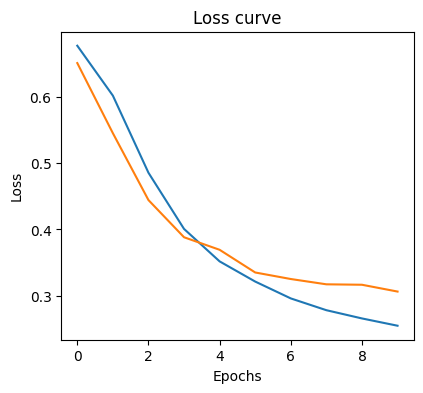

In [31]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="train loss")
plt.plot(history.history['val_loss'], label='validation loss')
plt.title("Loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

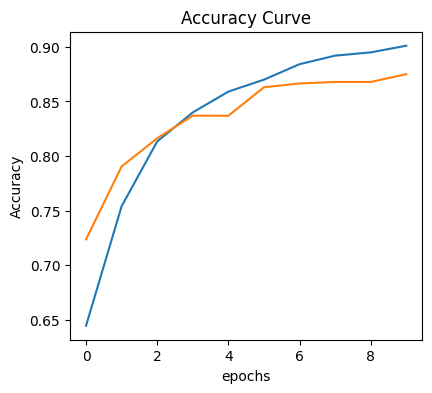

In [32]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title("Accuracy Curve")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.show()

In [41]:
new_review = ["the movie was okay, i didn't like the acting, and the story was really great"]

# Convert to sequence using the same tokenizer
seq = tokenizer.texts_to_sequences(new_review)

# Pad the sequence
padded_seq = pad_sequences(seq, maxlen=200, padding='post', truncating='post')

prediction = model.predict(padded_seq)

# Since it's a binary classification with sigmoid, output is between 0 and 1
if prediction[0][0] >= 0.5:
    print("🟢 Positive Sentiment")
else:
    print("🔴 Negative Sentiment")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
🔴 Negative Sentiment
